In [1]:
from pytrends.request import TrendReq
pytrends = TrendReq()

In [2]:
import pandas as pd

In [3]:
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import jsonpickle
import os
import tweepy
import csv #Import csv

In [4]:
import datetime as DT
today = DT.date.today()
week_ago = today - DT.timedelta(days=7)

In [5]:
kw_list = ["National Sandwich Day", "Me too"]
pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US')

In [6]:
GoogleTrendsNSDxMT_df=pytrends.interest_over_time()

In [7]:
kw_list= [ "iPhone X","World Series Game 7"]
pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US')

In [8]:
GoogleTrendsiPXxWSG7_df=pytrends.interest_over_time()

In [9]:
GoogleTrendsNSDxMT_df=GoogleTrendsNSDxMT_df[['National Sandwich Day', 'Me too']]
GoogleTrendsiPXxWSG7_df=GoogleTrendsiPXxWSG7_df[['iPhone X', 'World Series Game 7']]

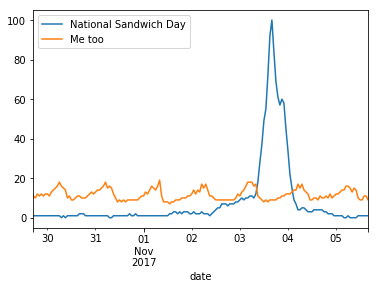

In [10]:
GoogleTrendsNSDxMT_chart= GoogleTrendsNSDxMT_df.plot.line()

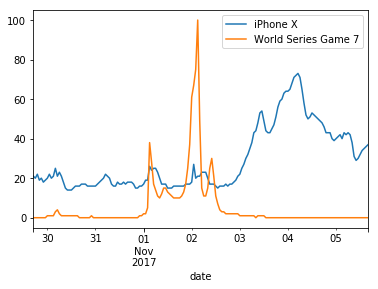

In [11]:
GoogleTrendsiPXxWSG7_chart= GoogleTrendsiPXxWSG7_df.plot.line()

In [12]:

#Consumer Key 
API_KEY= 'QjyJ4Aa8xTm6Yyok0xHYC7q1b'
#Consumer Secret (Hey Don't Look!)
API_SECRET= 'QAKECWDILlUVQmwxmgzEfb50ajUdXuFhmkIbHbfhN6eXH9b9y2'


In [13]:
# Access Twitter, using AppAuth instead of OAuth to increase speed
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True,
				   wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)


In [14]:
def hashtag_tweets(hashtag):
    searchQuery = hashtag  # this is what we're searching for
    maxTweets = 10000000 # Some arbitrary large number
    tweetsPerQry = 100  # this is the max the API permits
    fname = 'hashtag_tweets.csv'
    
    csvFile = open('hashtag_tweets.csv', 'a')
    csvwriter= csv.writer(csvFile, delimiter=' ')
    csvwriter.writerow(['DateTime'])

    
   

    
    # If results from a specific ID onwards are reqd, set since_id to that ID.
    # else default to no lower limit, go as far back as API allows
    sinceId = None

    # If results only below a specific ID are, set max_id to that ID.
    # else default to no upper limit, start from the most recent tweet matching the search query.
    max_id = (-1)

    tweetCount = 0
    print("Downloading max {0} tweets".format(maxTweets))
    with open(fname, 'w') as f:
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                for tweet in new_tweets:
                     csvwriter.writerow([tweet.created_at])
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id
            except tweepy.TweepError as e:
                # Just exit if any error
                print("some error : " + str(e))
                break

    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fname))
    
    csvFile.close()
    hashtag_tweets_df= pd.read_csv('../FinalProject/hashtag_tweets.csv')
    hashtag_tweets_df.insert(1, 'Tweet Count', range(len(hashtag_tweets_df)))
    hashtag_tweets_df['DateTime'] = pd.to_datetime(hashtag_tweets_df['DateTime'])
    ts = hashtag_tweets_df.set_index('DateTime')
    hashtag_tweets_df= ts.resample('H').count()
    hashtag_tweets_df.plot.line(legend=False)

In [ ]:
hashtag_tweets('#nationalsandwichday')

In [ ]:
hashtag_tweets('#metoo')

In [ ]:
hashtag_tweets('#iphoneX')

In [ ]:
hashtag_tweets('#worldseriesgame7')

Downloaded 40 tweets
No more tweets found
Downloaded 40 tweets, Saved to hashtag_tweets.csv


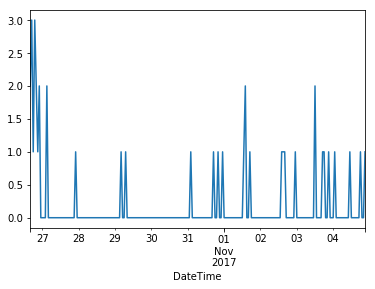

In [15]:
hashtag_tweets('#GoGreater')